In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime

In [13]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [17]:
us_supply = pd.read_csv("US_Weekly_M2_Money_Supply_Inflation_Rate")
us_supply['observation_date'] = pd.to_datetime(us_supply['observation_date'])
us_supply.head(6)

,observation_date,m2_money,scale,m2_inflation_rate
0,1980-11-03,1595.2,Billions,NaN
1,1980-11-10,1601.2,Billions,0.003761
2,1980-11-17,1602.9,Billions,0.001062
3,1980-11-24,1594.8,Billions,-0.005053
4,1980-12-01,1599.8,Billions,0.003135
5,1980-12-08,1605.3,Billions,0.003438


In [19]:
oil_price = pd.read_csv("crude-oil-price.csv")
oil_price['date'] = pd.to_datetime(oil_price['date'])
oil_price.head(6)

,date,price,percentChange,change
0,1983-06-01 00:00:00+00:00,31.38,NaN,NaN
1,1983-07-01 00:00:00+00:00,32.00,1.976,0.62
2,1983-08-01 00:00:00+00:00,31.59,-1.281,-0.41
3,1983-09-01 00:00:00+00:00,30.36,-3.894,-1.23
4,1983-10-01 00:00:00+00:00,30.37,0.033,0.01
5,1983-11-01 00:00:00+00:00,29.23,-3.754,-1.14


In [21]:
over_us_supply = us_supply[us_supply['observation_date'] > datetime(1983,1,1)]

mov_avg = oil_price['price'].rolling(window=50).mean()

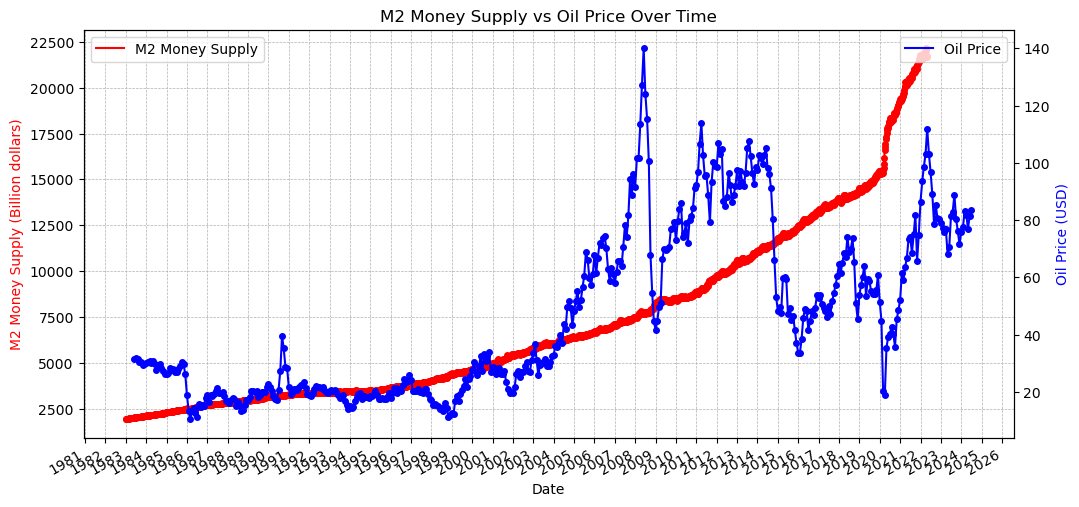

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()

# Plot data
ax1.plot(over_us_supply['observation_date'], over_us_supply['m2_money'], color="red", label="M2 Money Supply")
ax2.plot(oil_price['date'], oil_price['price'], color="blue", label="Oil Price")

# Customize the date format on the x-axis
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()

# Add titles and labels
plt.title("M2 Money Supply vs Oil Price Over Time")
ax1.set_xlabel("Date")
ax1.set_ylabel("M2 Money Supply (Billion dollars)", color="red")
ax2.set_ylabel("Oil Price (USD)", color="blue")

# Add grid and customize it
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.grid(False)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Optionally add markers
ax1.plot(over_us_supply['observation_date'], over_us_supply['m2_money'], 'o', color="red", markersize=4)
ax2.plot(oil_price['date'], oil_price['price'], 'o', color="blue", markersize=4)

# Show the plot
plt.show()

### Every Year Price Variation

In [25]:
oil_price['date'] = pd.to_datetime(oil_price['date'])
oil_price['year'] = oil_price['date'].dt.year

In [27]:
df3=oil_price.groupby("year").mean()
df3.head(2)

,date,price,percentChange,change
year,,,,
1983,1983-08-31 13:42:51.428571456+00:00,30.647143,-0.942333,-0.296667
1984,1984-06-16 08:00:00+00:00,29.240833,-0.883000,-0.265833


In [52]:
import pandas as pd

us_supply['observation_date'] = pd.to_datetime(us_supply['observation_date'])

us_supply['m2_inflation_rate'] = pd.to_numeric(us_supply['m2_inflation_rate'], errors='coerce')  # Example conversion
us_supply['m2_money'] = pd.to_numeric(us_supply['m2_money'], errors='coerce')

df4 = us_supply.groupby(us_supply['observation_date'].dt.year)['m2_inflation_rate'].mean()
df5 = us_supply.groupby(us_supply['observation_date'].dt.year)['m2_money'].mean()

In [54]:
df4.head(3)

observation_date
1980    0.000520
1981    0.001809
1982    0.001722
Name: m2_inflation_rate, dtype: float64

In [33]:
df5.head(3)

observation_date
1980    1601.088889
1981    1678.838462
1982    1829.963462
Name: m2_money, dtype: float64

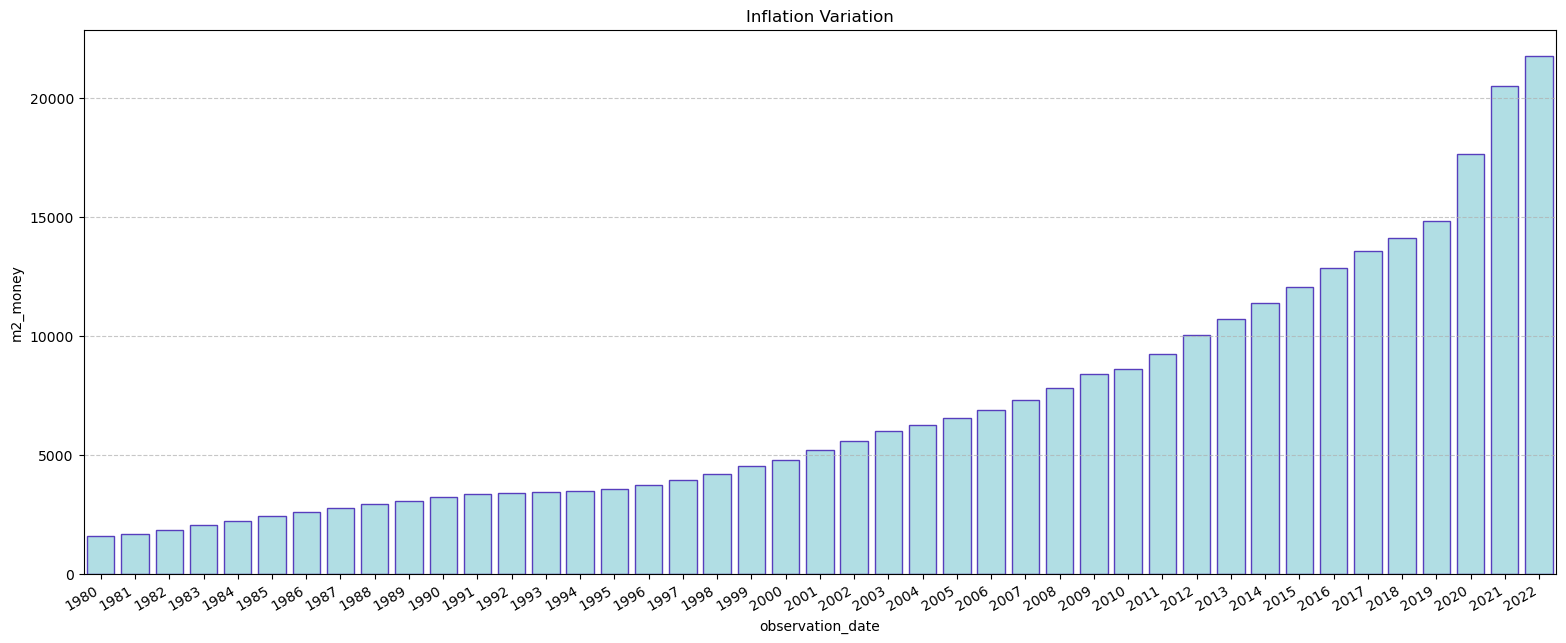

In [47]:
import seaborn as sns
plt.figure(figsize=(19, 8))
plt.title("Inflation Variation")
sns.set_palette('Set2')

g = sns.barplot(x=df5.index, y=df5, linewidth=1, color='#a9e5ec', edgecolor="#573ebd")

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
g.figure.autofmt_xdate()

plt.show()

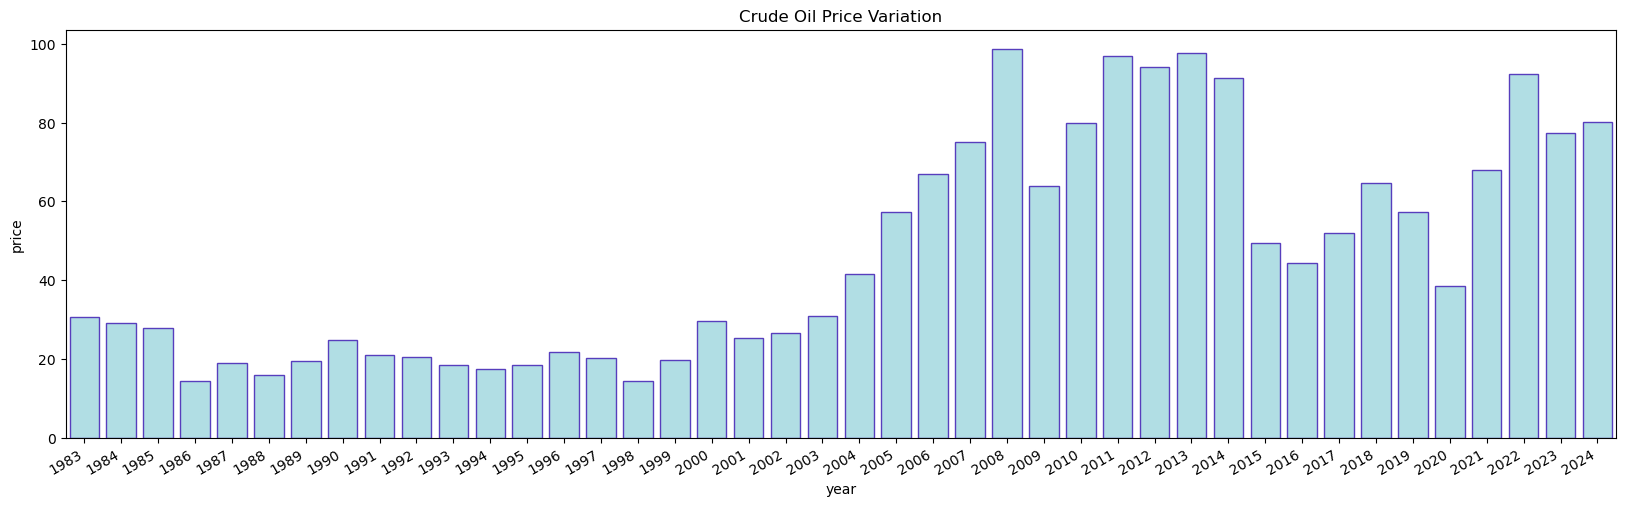

In [49]:
plt.figure(figsize=(20, 6))
plt.title("Crude Oil Price Variation")
sns.set_palette('Set2')

g = sns.barplot(x=df3.index, y=df3.price, linewidth=1, color='#a9e5ec', edgecolor="#573ebd")
g.figure.autofmt_xdate()

plt.show()

### Crude Oil Price Variation and Inflation Throughtout the Year

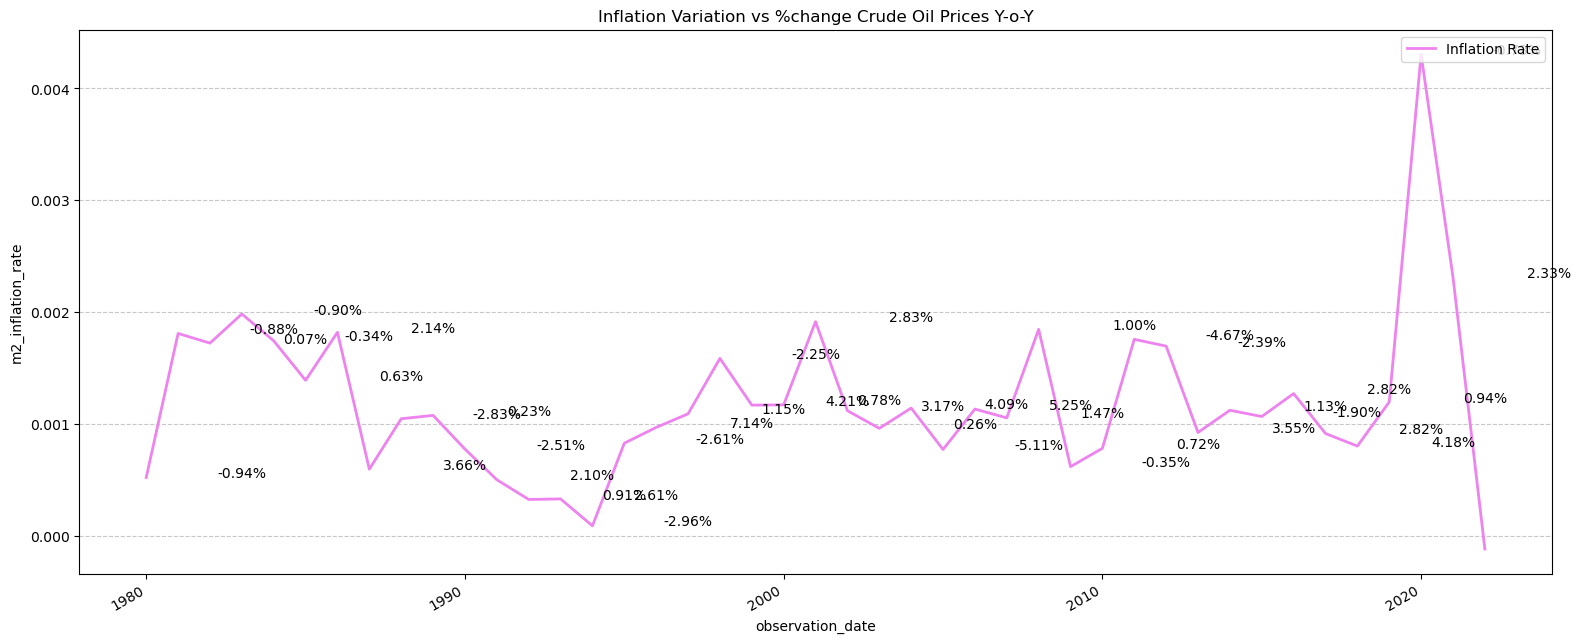

In [43]:
# Grouping and averaging the data
df4 = us_supply.groupby(us_supply['observation_date'].dt.year)['m2_inflation_rate'].mean()
df5 = us_supply.groupby(us_supply['observation_date'].dt.year)['m2_money'].mean()

# Create a figure and axis
plt.figure(figsize=(19, 8))
plt.title("Inflation Variation vs %change Crude Oil Prices Y-o-Y")
sns.set_palette('Set2')

# Creating the line plot
g = sns.lineplot(x=df4.index, y=df4, linewidth=2, color='violet')

# Adding gridlines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adding legend
plt.legend(['Inflation Rate'], loc='upper right')

# Adding percent change labels
for index, value in enumerate(df3.percentChange):
    plt.text(df3.index[index], df4.iloc[index], f'{value:.2f}%', color='black', ha='center')

# Formatting x-axis labels
g.figure.autofmt_xdate()

plt.show()


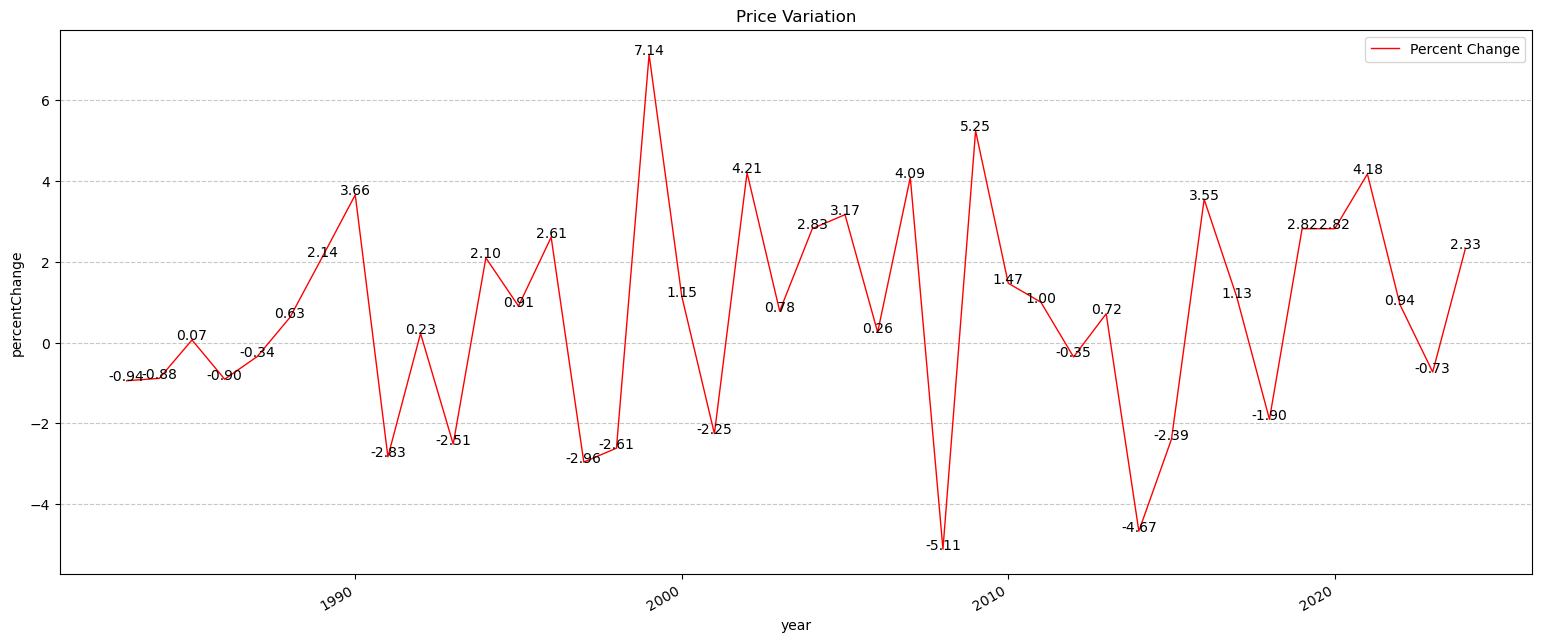

In [56]:

plt.figure(figsize=(19, 8))
plt.title("Price Variation")
sns.set_palette('Set2')

# Plotting the lineplot without the 'edgecolor' argument
g = sns.lineplot(x=df3.index, y=df3.percentChange, linewidth=1, color='red')

# Adding gridlines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adding values on top of the line plot
for index, value in enumerate(df3.percentChange):
    g.text(df3.index[index], value, f'{value:.2f}', color='black', ha='center')

# Adding legend
plt.legend(['Percent Change'], loc='upper right')

# Formatting x-axis labels
g.figure.autofmt_xdate()

plt.show()

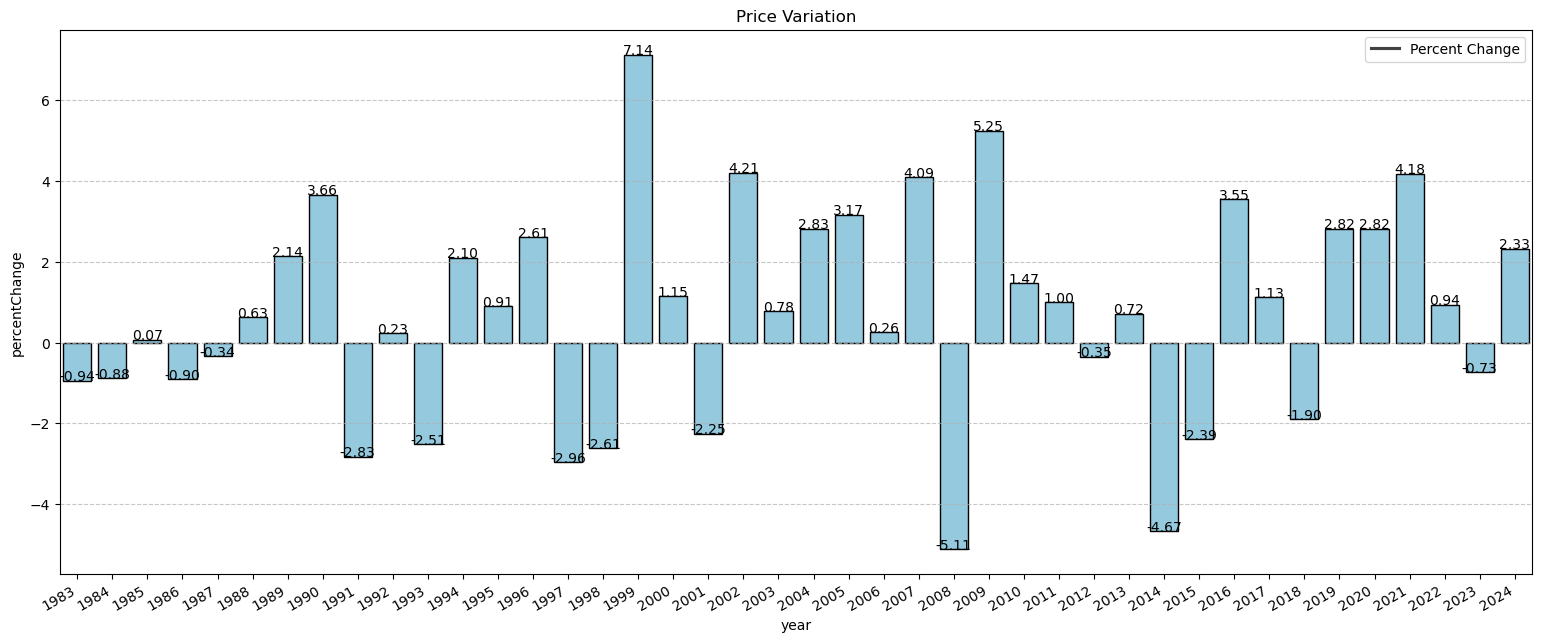

In [58]:
plt.figure(figsize=(19, 8))
plt.title("Price Variation")
sns.set_palette('Set2')

g = sns.barplot(x=df3.index, y=df3.percentChange, linewidth=1, color='skyblue', edgecolor="black")

# Adding gridlines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adding values on top of bars
for index, value in enumerate(df3.percentChange):
    g.text(index, value, f'{value:.2f}', color='black', ha='center')

# Adding legend
plt.legend(['Percent Change'], loc='upper right')

# Formatting x-axis labels
g.figure.autofmt_xdate()

plt.show()

### CORRELATION ANALYSIS

In [60]:
# Convert date to datetime without timezone
oil_price['date'] = oil_price['date'].dt.tz_localize(None)

# Merge the DataFrames
merge_df = over_us_supply.merge(oil_price, left_on='observation_date', right_on='date')

# Optionally, drop the redundant 'date' column
# merge_df = merge_df.drop('date', axis=1)

# Display the last few rows of the merged DataFrame
merge_df.tail(6)

,observation_date,m2_money,scale,m2_inflation_rate,date,price,percentChange,change,year
60,2019-04-01,14652.3,Billions,0.008230,2019-04-01,63.91,6.269,3.7700,2019
61,2019-07-01,14778.0,Billions,0.008118,2019-07-01,58.58,-1.480,-0.8801,2019
62,2020-06-01,17915.4,Billions,0.007349,2020-06-01,39.27,10.651,3.7800,2020
63,2021-02-01,19389.2,Billions,0.005440,2021-02-01,61.50,17.816,9.3000,2021
64,2021-03-01,19630.9,Billions,0.004395,2021-03-01,59.16,-3.805,-2.3400,2021
65,2021-11-01,21177.9,Billions,0.006789,2021-11-01,65.85,-19.479,-15.9300,2021


In [62]:
# Check the data types of the columns
print(merge_df.dtypes)

observation_date     datetime64[ns]
m2_money                    float64
scale                        object
m2_inflation_rate           float64
date                 datetime64[ns]
price                       float64
percentChange               float64
change                      float64
year                          int32
dtype: object


In [64]:
merge_df = merge_df.drop(columns=['scale'])

In [66]:
# Display unique values in the columns to identify non-numeric entries
merge_df['m2_money'].unique()

array([ 2065.8,  2243.1,  2368.1,  2421.1,  2644.5,  2716.6,  2765.5,
        2844.6,  2944.5,  2998.8,  3181.9,  3242.6,  3339.8,  3346.1,
        3383.8,  3385.9,  3396.7,  3448.6,  3479.9,  3490.5,  3661.5,
        3702.9,  3715.4,  3957.2,  4032.4,  4156.3,  4384.7,  4423.5,
        4576.8,  4738. ,  4984.9,  5301.2,  5534. ,  5539.7,  6072.4,
        6086.3,  6112.5,  6356.4,  6528.3,  6783.7,  7127.8,  7346.7,
        7722.8,  8090.7,  8433.7,  8428.8,  8527.7,  8705.5,  9387.6,
       10196.6, 10720.4, 10670.7, 11432.4, 11659.8, 11932.7, 12454.7,
       12885.4, 13449.4, 13962.7, 14202. , 14652.3, 14778. , 17915.4,
       19389.2, 19630.9, 21177.9])

In [68]:
merge_df['price'].unique()

array([ 31.59,  28.46,  27.63,  27.12,  14.77,  17.94,  20.29,  16.01,
        15.18,  19.9 ,  22.68,  35.23,  20.96,  21.68,  21.6 ,  20.6 ,
        20.44,  15.43,  17.56,  18.89,  17.74,  21.2 ,  20.42,  21.18,
        17.64,  14.18,  12.27,  16.76,  24.59,  29.01,  28.66,  27.29,
        27.02,  29.2 ,  32.52,  35.76,  49.13,  68.94,  71.29,  58.14,
        94.53, 100.64,  44.6 ,  69.89,  79.66,  83.76,  84.11,  88.81,
        86.24,  93.46, 105.03,  91.16,  53.27,  59.47,  33.75,  44.7 ,
        48.32,  64.73,  65.31,  63.91,  58.58,  39.27,  61.5 ,  59.16,
        65.85])

In [70]:
# Print the updated DataFrame to verify
merge_df.head()

,observation_date,m2_money,m2_inflation_rate,date,price,percentChange,change,year
0,1983-08-01,2065.8,0.001843,1983-08-01,31.59,-1.281,-0.41,1983
1,1984-10-01,2243.1,0.004883,1984-10-01,28.46,-4.046,-1.20,1984
2,1985-04-01,2368.1,0.006075,1985-04-01,27.63,-2.333,-0.66,1985
3,1985-07-01,2421.1,0.005649,1985-07-01,27.12,0.930,0.25,1985
4,1986-09-01,2644.5,0.003034,1986-09-01,14.77,-7.107,-1.13,1986


In [72]:
merge_df.corr()['price']

observation_date     0.710723
m2_money             0.612049
m2_inflation_rate    0.270587
date                 0.710723
price                1.000000
percentChange        0.005807
change              -0.033632
year                 0.707924
Name: price, dtype: float64

In [74]:
# Calculate the correlation matrix for all columns
correlation_matrix = merge_df.corr()

# Filter the correlation matrix to include only float64 columns
float_cols_corr = correlation_matrix.loc['price', merge_df.select_dtypes(include='float64').columns]

# Print the correlation with float64 columns
print(float_cols_corr)

m2_money             0.612049
m2_inflation_rate    0.270587
price                1.000000
percentChange        0.005807
change              -0.033632
Name: price, dtype: float64


### REGRESSION MODELLING AND PREDICTION EFFECTIVNESS

In [76]:
merge_df.isnull().sum()

observation_date     0
m2_money             0
m2_inflation_rate    0
date                 0
price                0
percentChange        0
change               0
year                 0
dtype: int64

In [115]:
na_df = merge_df.dropna()

### Random Forest Regressor based Predictive Analysis

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Selecting columns with a list instead of a set
x_train, x_test, y_train, y_test = train_test_split(merge_df[['m2_money', 'm2_inflation_rate', 'price', 'percentChange', 'change']], merge_df['price'])

# Create RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=2022)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=2022)

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(x_test)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

In [84]:
print("MSE: ", mse)
print("R2: ", r2)

MSE:  12.27514951411764
R2:  0.9820578580920225


Text(0, 0.5, 'Real data')

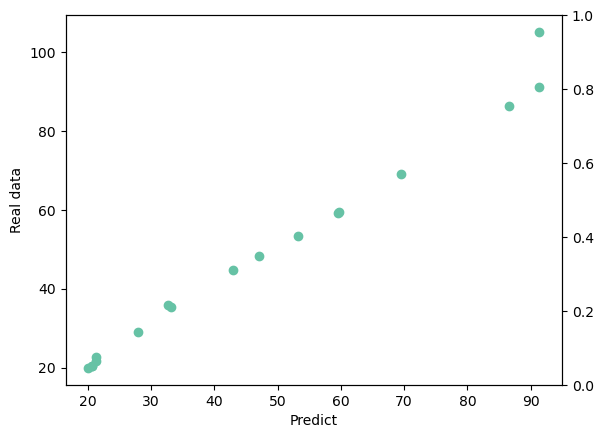

In [86]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.scatter(x = pred, y = y_test)
ax.set_xlabel("Predict")
ax.set_ylabel("Real data")
#ax2.plot(x = pred, y = y_test, color=orange)

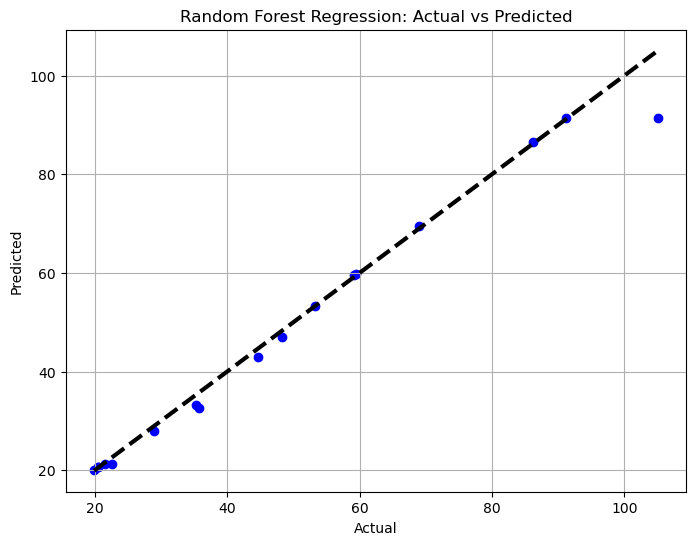

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

### Gradient Boosting Regressor based Predictive Analysis

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Selecting columns with a list instead of a set
x_train, x_test, y_train, y_test = train_test_split(merge_df[['m2_money', 'm2_inflation_rate', 'price', 'percentChange', 'change']], merge_df['price'])

# Create GradientBoostingRegressor model
params = {
    'learning_rate': 0.01,
    'max_depth': 16,
    'n_estimators': 1000,
    'random_state': 2022
}

model = GradientBoostingRegressor(**params)

# Fit the model
model.fit(x_train, y_train)


GradientBoostingRegressor(learning_rate=0.01, max_depth=16, n_estimators=1000,
                          random_state=2022)

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(x_test)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

In [94]:
print("MSE: ", mse)
print("R2: ", r2)

MSE:  4.123196691560864
R2:  0.9921190119597412


Text(0, 0.5, 'Real data')

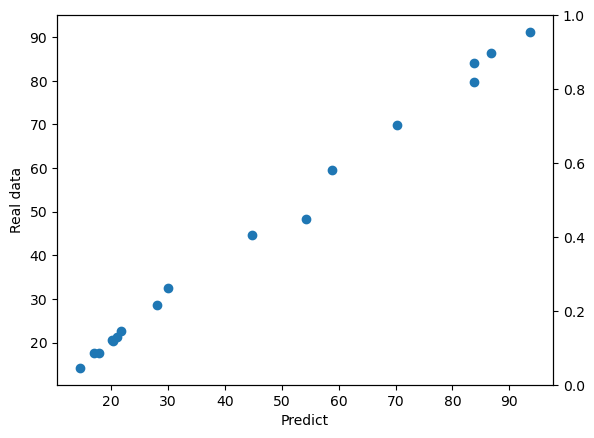

In [361]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.scatter(x = pred, y = y_test)
ax.set_xlabel("Predict")
ax.set_ylabel("Real data")
# ax2.plot(x = pred, y = y_test, color=orange)

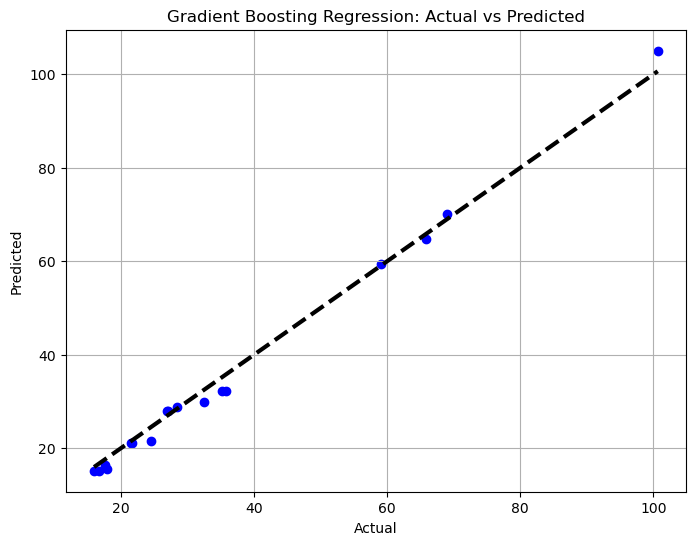

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

### Support Vector Regressor based Predictive Analysis 

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selecting columns with a list instead of a set
x_train, x_test, y_train, y_test = train_test_split(merge_df[['m2_money', 'm2_inflation_rate', 'price', 'percentChange', 'change']], merge_df['price'])

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert to numpy arrays
x_train_scaled = np.array(x_train_scaled)
x_test_scaled = np.array(x_test_scaled)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create SVR model
params = {
    'kernel': 'rbf',  # Radial basis function kernel
    'C': 1.0,         # Regularization parameter
    'epsilon': 0.1    # Epsilon parameter in the epsilon-insensitive loss function
}

model = SVR(**params)

# Fit the model
model.fit(x_train_scaled, y_train)

# Predict on test set
pred = model.predict(x_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 938.1958896883824
R-squared: 0.0660972226013492


Text(0, 0.5, 'Real data')

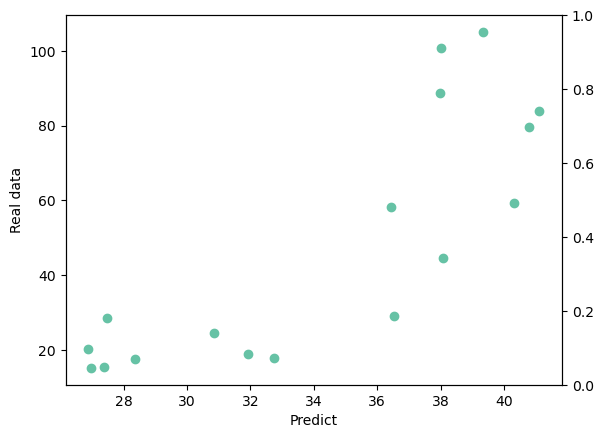

In [100]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.scatter(x = pred, y = y_test)
ax.set_xlabel("Predict")
ax.set_ylabel("Real data")
# ax2.plot(x = pred, y = y_test, color=orange)

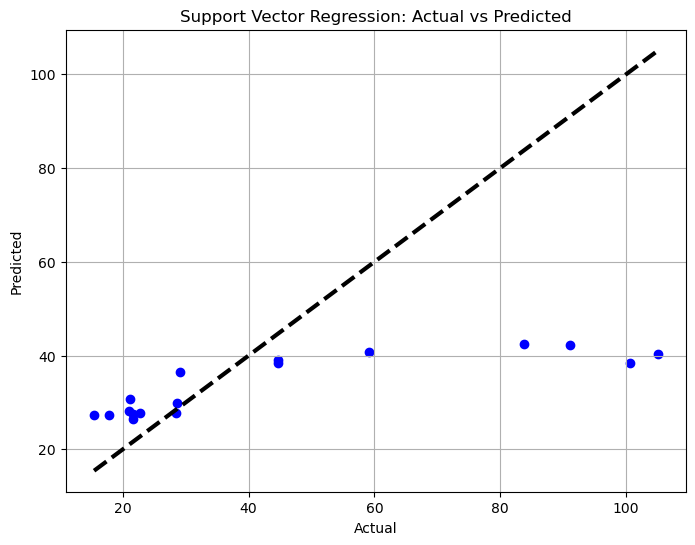

In [369]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

### Ridge Regression based Predictive Analysis

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selecting columns with a list instead of a set
x_train, x_test, y_train, y_test = train_test_split(merge_df[['m2_money', 'm2_inflation_rate', 'price', 'percentChange', 'change']], merge_df['price'])

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert to numpy arrays
x_train_scaled = np.array(x_train_scaled)
x_test_scaled = np.array(x_test_scaled)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create Ridge Regression model
alpha = 1.0  # Regularization strength
model = Ridge(alpha=alpha)

# Fit the model
model.fit(x_train_scaled, y_train)

Ridge()

In [104]:
# Predict on test set
pred = model.predict(x_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.33854081245589274
R-squared: 0.9992140783847174


Text(0, 0.5, 'Real data')

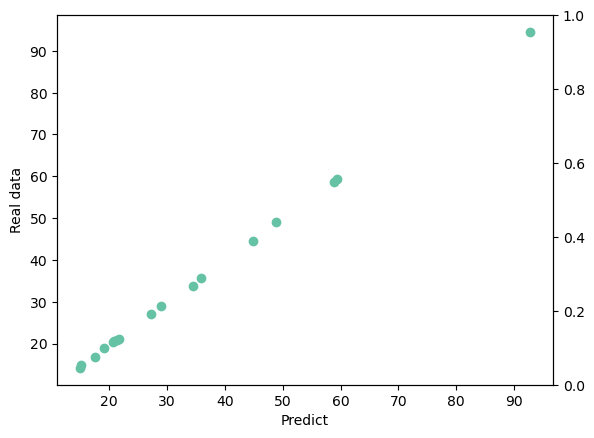

In [106]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.scatter(x = pred, y = y_test)
ax.set_xlabel("Predict")
ax.set_ylabel("Real data")
# ax2.plot(x = pred, y = y_test, color=orange)

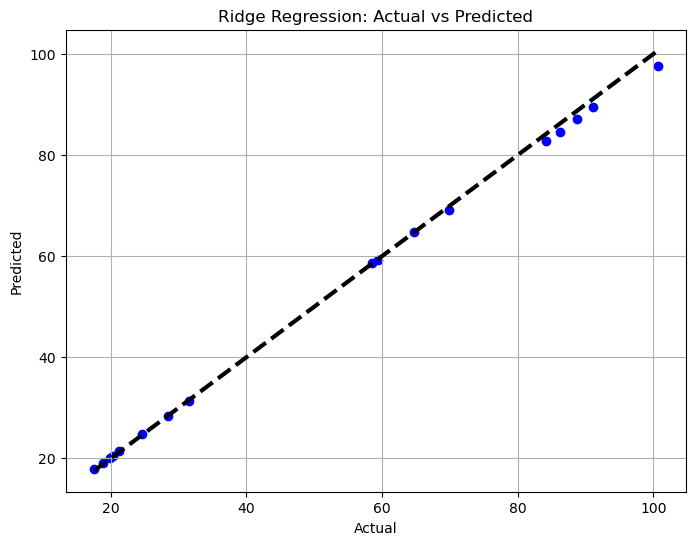

In [378]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

### Neural Network Regressor based Predictive Analysis

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selecting columns with a list instead of a set
x_train, x_test, y_train, y_test = train_test_split(merge_df[['m2_money', 'm2_inflation_rate', 'price', 'percentChange', 'change']], merge_df['price'])

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert to numpy arrays
x_train_scaled = np.array(x_train_scaled)
x_test_scaled = np.array(x_test_scaled)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, 
                     batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200, 
                     shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                     early_stopping=False, validation_fraction=0.1, n_iter_no_change=10, 
                     max_fun=15000)

# Fit the model
model.fit(x_train_scaled, y_train)

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [302]:

# Predict on test set
pred = model.predict(x_test_scaled)
print(pred)

[ 3.24996452 28.10726626 19.84576096 19.57078938 15.16508334  2.06109774
 12.81101185  3.11565864  2.11574824  4.54660783  1.67688844  9.50659527
  8.98586109  5.25323761 16.17079671  2.003722    2.19494667]


In [304]:
# Evaluate performance
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1644.7788571760036
R-squared: -1.6570938265498638


Text(0, 0.5, 'Real data')

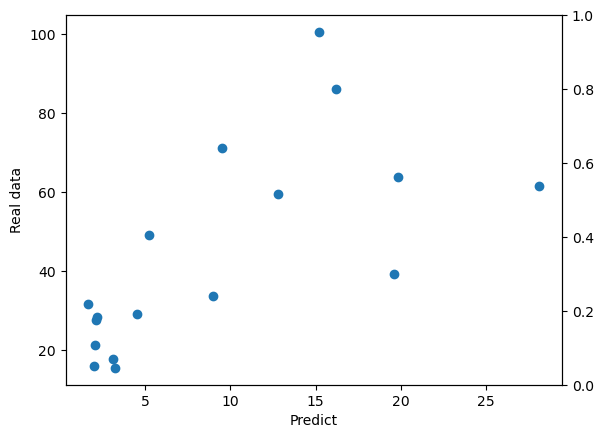

In [306]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.scatter(x = pred, y = y_test)
ax.set_xlabel("Predict")
ax.set_ylabel("Real data")
# ax2.plot(x = pred, y = y_test, color=orange)

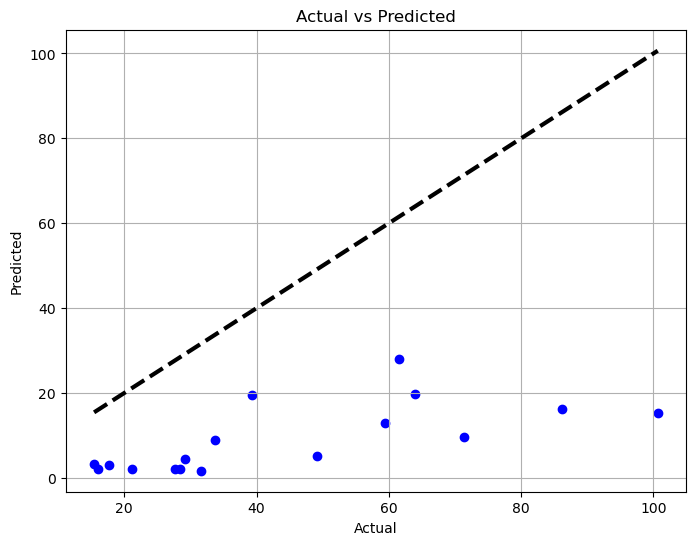

In [308]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()